In [945]:
import pandas as pd
import numpy as np
dataframe = pd.read_csv("marvel-wikia-data.csv", encoding='latin1')
dataframe.head(5)
#I have tried different encodings:latin1;utf-8;utf-8-sig; and some(very few) values to see if that would help with reading any of the values

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [946]:
dataframe.shape

(16376, 13)

In [947]:
#checking for missing values
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           16376 non-null  int64  
 1   name              16376 non-null  object 
 2   urlslug           16376 non-null  object 
 3   ID                12606 non-null  object 
 4   ALIGN             13564 non-null  object 
 5   EYE               6609 non-null   object 
 6   HAIR              12112 non-null  object 
 7   SEX               15522 non-null  object 
 8   GSM               90 non-null     object 
 9   ALIVE             16373 non-null  object 
 10  APPEARANCES       15280 non-null  float64
 11  FIRST APPEARANCE  15561 non-null  object 
 12  Year              15561 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.6+ MB


In [948]:
print("Describe Data")
print("-"*125)
print(dataframe.describe())
print("Summarized Data")
print("-"*125)
print(dataframe.describe(include=['O']))

Describe Data
-----------------------------------------------------------------------------------------------------------------------------
             page_id   APPEARANCES          Year
count   16376.000000  15280.000000  15561.000000
mean   300232.082377     17.033377   1984.951803
std    253460.403399     96.372959     19.663571
min      1025.000000      1.000000   1939.000000
25%     28309.500000      1.000000   1974.000000
50%    282578.000000      3.000000   1990.000000
75%    509077.000000      8.000000   2000.000000
max    755278.000000   4043.000000   2013.000000
Summarized Data
-----------------------------------------------------------------------------------------------------------------------------
                             name              urlslug               ID  \
count                       16376                16376            12606   
unique                      16376                16376                4   
top     Carter Ryking (Earth-616)  \/Saber_(Earth-61

In [949]:
#examining the columns and deciding which columns need to be kept for the future analysis:
# Column "page_id" contains unique IDs for the characters in wikia. Since I will be joining data from different sources in the future, 
#I believe this column won't be valuable for analysis.
#One more column that I won't be including is the column with the URLs for the characters in wikia. The column's name is 'urlslug'.
#Column "first_appearance" is basically redunt because the column "year" already inlcudes the information about the year of first apperance. 
#I don't think month of the year will be needed in  my analysis so I am keeping just the column "YEAR" 
#Column "Appearances" is outdated since the last information entered was in 2014. This data is not up-to-date at this time. I also was not going to have it 
#in the final dataset. I will be removing the column.

In [950]:
#removing the columns mentioned above
dataframe.drop('urlslug', axis=1,inplace = True)
dataframe.drop('FIRST APPEARANCE', axis=1, inplace = True)
dataframe.drop('APPEARANCES', axis=1, inplace = True)
dataframe.drop('page_id', axis=1, inplace = True)
dataframe.head()

,name,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,Year
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,1962.0
1,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1974.0
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1963.0
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,1950.0


In [951]:
#deciding wheteher I need to remove the column GSM. 
#calculating the percentage of values that are MISSING:
print("{} percent of the values from column 'GSM'are missing values".format(100 - (round(90*100/16736,1))))
#checking if for the values that are not missing in column "GSM" we have missing values from the column "SEX" (they contain similar information).
newdataframe = dataframe[(dataframe["GSM"].notnull()) & (dataframe["SEX"].isnull())]
print(newdataframe)

#we can see that this is not the case. For the values that are not missing in column "GSM" we also have values that are not missing for the column "SEX"
#my decision is to remove the column "GSM" since it contains less than 0.5 percent of values that are not missing. Also, moving values from column "GSM" to "SEX" 
#won't help since for the values present in "GSM" we have values present in "SEX".

99.5 percent of the values from column 'GSM'are missing values
Empty DataFrame
Columns: [name, ID, ALIGN, EYE, HAIR, SEX, GSM, ALIVE, Year]
Index: []


In [952]:
#removing column 'GSM'
dataframe.drop('GSM', axis=1, inplace = True)
dataframe.head()

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,Year
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,1962.0
1,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Living Characters,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,1974.0
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,1963.0
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,1950.0


In [953]:
##cleaning the columns headers to all lowercase to make it easier to work with 
dataframe.columns = dataframe.columns.str.strip().str.lower()
dataframe.head()

,name,id,align,eye,hair,sex,alive,year
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,1962.0
1,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Living Characters,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,1974.0
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,1963.0
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,1950.0


In [954]:
#renaming some of the headers
dataframe.rename(columns={'id':'identity',
                          'align':'personality',
                         'sex':'gender'}, 
                 inplace=True)
dataframe.head()

,name,identity,personality,eye,hair,gender,alive,year
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,1962.0
1,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Living Characters,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,1974.0
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,1963.0
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,1950.0


In [955]:
#removing certain text from some columns that seems reduntant and unnecessary
dataframe['eye'] = dataframe['eye'].str.replace('Eyes', '')
dataframe['hair'] = dataframe['hair'].str.replace('Hair', '')
dataframe['gender'] = dataframe['gender'].str.replace('Characters', '')
dataframe['alive'] = dataframe['alive'].str.replace('Characters', '')
dataframe['personality'] = dataframe['personality'].str.replace('Characters', '')
dataframe['identity'] = dataframe['identity'].str.replace('Identity', '')
dataframe['name']  = dataframe['name'] .str.replace(r'\(.*?\)','')
dataframe.head()

,name,identity,personality,eye,hair,gender,alive,year
0,Spider-Man,Secret,Good,Hazel,Brown,Male,Living,1962.0
1,Captain America,Public,Good,Blue,White,Male,Living,1941.0
2,Wolverine,Public,Neutral,Blue,Black,Male,Living,1974.0
3,Iron Man,Public,Good,Blue,Black,Male,Living,1963.0
4,Thor,No Dual,Good,Blue,Blond,Male,Living,1950.0


In [956]:
def strip_whitespace(stri):
    return stri.strip()
#applying the function for education column and creating a new column
dataframe['name']=dataframe['name'].apply(strip_whitespace)
dataframe.head()
#dataframe.shape

,name,identity,personality,eye,hair,gender,alive,year
0,Spider-Man,Secret,Good,Hazel,Brown,Male,Living,1962.0
1,Captain America,Public,Good,Blue,White,Male,Living,1941.0
2,Wolverine,Public,Neutral,Blue,Black,Male,Living,1974.0
3,Iron Man,Public,Good,Blue,Black,Male,Living,1963.0
4,Thor,No Dual,Good,Blue,Blond,Male,Living,1950.0


In [957]:
#converting all of the text except for the column 'name' to lowercase for consistency in future analysis when working with multiple dataframes.
dataframe['personality'] = dataframe['personality'].str.lower()
dataframe['eye'] = dataframe['eye'].str.lower()
dataframe['identity'] = dataframe['identity'].str.lower()
dataframe['hair'] = dataframe['hair'].str.lower()
dataframe['gender'] = dataframe['gender'].str.lower()
dataframe['alive'] = dataframe['alive'].str.lower()
dataframe.head()

,name,identity,personality,eye,hair,gender,alive,year
0,Spider-Man,secret,good,hazel,brown,male,living,1962.0
1,Captain America,public,good,blue,white,male,living,1941.0
2,Wolverine,public,neutral,blue,black,male,living,1974.0
3,Iron Man,public,good,blue,black,male,living,1963.0
4,Thor,no dual,good,blue,blond,male,living,1950.0


In [958]:
#making sure any of the white spaces present are removed
dataframe['personality'] = dataframe['personality'].str.strip()
dataframe['identity'] = dataframe['identity'].str.strip()
dataframe['eye'] = dataframe['eye'].str.strip()
dataframe['hair'] = dataframe['hair'].str.strip()
dataframe['gender'] = dataframe['gender'].str.strip()
dataframe['alive'] = dataframe['alive'].str.strip()
dataframe.head()

,name,identity,personality,eye,hair,gender,alive,year
0,Spider-Man,secret,good,hazel,brown,male,living,1962.0
1,Captain America,public,good,blue,white,male,living,1941.0
2,Wolverine,public,neutral,blue,black,male,living,1974.0
3,Iron Man,public,good,blue,black,male,living,1963.0
4,Thor,no dual,good,blue,blond,male,living,1950.0


In [959]:
dataframe.shape

(16376, 8)

In [960]:
#after going through the values of column "name" I noticed some of the names were practicly ilegible. Before removing duplicates I changed the characters' names when I could.
dataframe.at[16171, 'name']='Spider-Girl'
dataframe.at[15355,'name']='Thumper Morgan'
dataframe.at[515,'name']='Jessan Hoan'
dataframe.at[533, 'name']='Esteban Corazon De Ablo'
dataframe.at[612,'name']='Armando Munoz'
dataframe.at[1233,'name']='Maria Aracely Penalba'
dataframe.at[1354,'name']='Samuel Pare'
dataframe.at[1783,'name']='Andrew Gerard'
dataframe.at[2357, 'name']='Gloria Munoz'
dataframe.at[4567, 'name']='Achmed El Gibar'
dataframe.at[6091,'name']='Rene Duquesne'
dataframe.at[6437,'name']='Virtual Organism Turing Experiment'
dataframe.at[6783,'name']='Hector Munoz'
dataframe.at[7004,'name']='Salaḥ ad-Din Yusuf ibn Ayyub'
dataframe.at[7585,'name']='Flambe'
dataframe.at[9659,'name']='Tomas Aguado'
dataframe.at[9672,'name']=' Hughes Ait-Kaci '
dataframe.at[9979,'name']='Gunter Gross'
dataframe.at[12371,'name']='Kane Milohai'
dataframe.at[12827,'name']="Amber D'Alexis"
dataframe.at[12992,"name"]='Senor Muerte'
dataframe.at[13850,'name']= 'Nefer Neith Sinu'
dataframe.at[14407,'name']='Marcus Estrada'
dataframe.at[14479,'name']='Detective Fantome'
dataframe.at[15759,'name']='Vortex'
dataframe.at[15288,'name']='Elizabeth Ross'


In [961]:
dataframe.shape

(16376, 8)

In [962]:
#confirming if any of the changes took place
dataframe.loc[15288]

name           Elizabeth Ross
identity               secret
personality              good
eye                      blue
hair                    blond
gender                 female
alive                  living
year                     1941
Name: 15288, dtype: object

In [963]:
#removing the rows with the names that couldn't be deciphered
dataframe.drop([dataframe.index[2278], dataframe.index[2714], dataframe.index[2716], dataframe.index[3322], dataframe.index[3441], dataframe.index[6737], dataframe.index[6874], dataframe.index[7709], dataframe.index[9241], dataframe.index[13498], dataframe.index[14466],  dataframe.index[14743], dataframe.index[15430], dataframe.index[15498], dataframe.index[16113]],inplace=True)
#checking if the observations were removed
dataframe.shape

(16361, 8)

In [964]:
#removing duplicates but trying to keep the value out of the two or three identical ones  that has no missing values for the variable 'year' 
#since for this Milestone I willbe removing missing values for the column 'year' .
dataframe = dataframe[~dataframe['name'].duplicated(keep=False) | dataframe[['year']].notnull().any(axis=1)]
dataframe.shape

(16287, 8)

In [965]:
#removing duplicates but trying to keep the value out of the two or three identical ones that has no missing values for the variables 'personality' and 'identity'.
dataframe = dataframe[~dataframe['name'].duplicated(keep=False) | dataframe[['personality', 'identity']].notnull().any(axis=1)]
dataframe.shape

(16175, 8)

In [966]:
#removing duplicates but trying to keep the value out of the two or three identical ones that has no missing values for the variables 'hair' and 'gender'.
dataframe = dataframe[~dataframe['name'].duplicated(keep=False) | dataframe[['hair', 'gender']].notnull().any(axis=1)]
dataframe.shape

(16130, 8)

In [967]:
#removing duplicates but trying to keep the value out of the two or three identical ones that has no missing values for the variables 'eye'. 
#It has the most missing values, so it was considered last.Plus, missing values for this column won't be removed until I join the dataframes because 
#the same column is present in another dataset.
dataframe = dataframe[~dataframe['name'].duplicated(keep=False) | dataframe[['eye']].notnull().any(axis=1)]
dataframe.shape

(15408, 8)

In [968]:
#removing the rest of the duplicates
dataframe.drop_duplicates(subset='name', keep="first", inplace=True)
dataframe.shape

(15173, 8)

In [969]:
#after removing the duplicates considering the missing values in other columns I was able to keep more records that have fewer missing values and remove those that had more missing values.
dataframe.isnull().sum()

name              0
identity       3390
personality    2567
eye            8855
hair           3782
gender          760
alive             3
year            741
dtype: int64

In [970]:
#first I want to look closer at the 3 missing values for column ['alive']
dataframe[dataframe['alive'].isnull()]
#It looks like these observation do not have any valuable information except for the name. I will be removing them from the data set

,name,identity,personality,eye,hair,gender,alive,year
16293,Mj7711,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16329,Sharjeel786,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16347,TOR\/test,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [971]:
#removing the three missing values for this column
dataframe = dataframe.dropna(how='any', subset=['alive'])
len(dataframe[dataframe['alive'].isnull()])

0

In [972]:
#checking what values are unique for column 'alive'
dataframe['alive'].unique()

array(['living', 'deceased'], dtype=object)

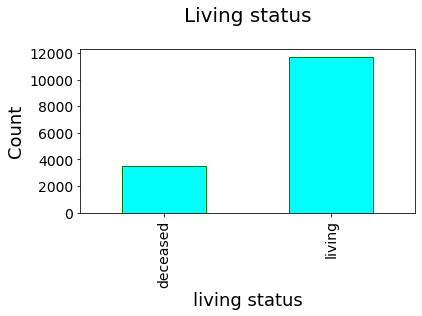

In [973]:
#creating the bar graph to see the count of these values
import matplotlib.pyplot as plt
ax = dataframe['alive'].value_counts().sort_index().plot(kind='bar',color = '#00FFFF', edgecolor='green', fontsize=14, figsize=(6,3))
#customizing the title
ax.set_title('Living status\n', fontsize=20)
#customizing x label
ax.set_xlabel('living status', fontsize=18)
#customizing y label
ax.set_ylabel('Count', fontsize=18);
plt.show()

In [974]:
#counting the number of missing values for the column year:
dataframe['year'].isnull().sum()

738

In [975]:
#this variable could be used to analize the year when biggest number of new characters first appeared. 
print("{} percent of the values from column 'year'are missing values".format(round(738*100/15184,1)))

4.9 percent of the values from column 'year'are missing values


In [978]:
#I am chosing to remove these missing values for the sake of the time series future analysis. 
dataframe = dataframe.dropna(how='any', subset=['year'])
len(dataframe[dataframe['year'].isnull()])

0

In [979]:
dataframe.shape

(14432, 8)

In [980]:
#converting the type float of column 'year' into an integer
dataframe['year'] = dataframe['year'].astype(int)
dataframe.head()

,name,identity,personality,eye,hair,gender,alive,year
0,Spider-Man,secret,good,hazel,brown,male,living,1962
1,Captain America,public,good,blue,white,male,living,1941
2,Wolverine,public,neutral,blue,black,male,living,1974
3,Iron Man,public,good,blue,black,male,living,1963
4,Thor,no dual,good,blue,blond,male,living,1950


In [981]:
#confirming that no values with 0 are left in the dataframe
dataframe[dataframe['year']==0]

,name,identity,personality,eye,hair,gender,alive,year


In [982]:
#checking the unique values from column 'year'
dataframe['year'].unique()

array([1962, 1941, 1974, 1963, 1950, 1961, 1975, 1964, 1965, 1968, 1980,
       1972, 1970, 1967, 1976, 1966, 1982, 1990, 1986, 1969, 1944, 1939,
       1949, 1979, 1991, 1977, 1989, 1940, 1978, 1971, 1984, 2005, 1973,
       1945, 1985, 1992, 1988, 1948, 1981, 2004, 1983, 2000, 2003, 1960,
       1987, 1951, 1994, 2008, 2006, 2001, 2002, 1993, 1953, 1943, 1995,
       1947, 1956, 2010, 1946, 1998, 2009, 1997, 1996, 1954, 2011, 2012,
       1999, 1955, 2007, 2013, 1952, 1942, 1958, 1957, 1959])

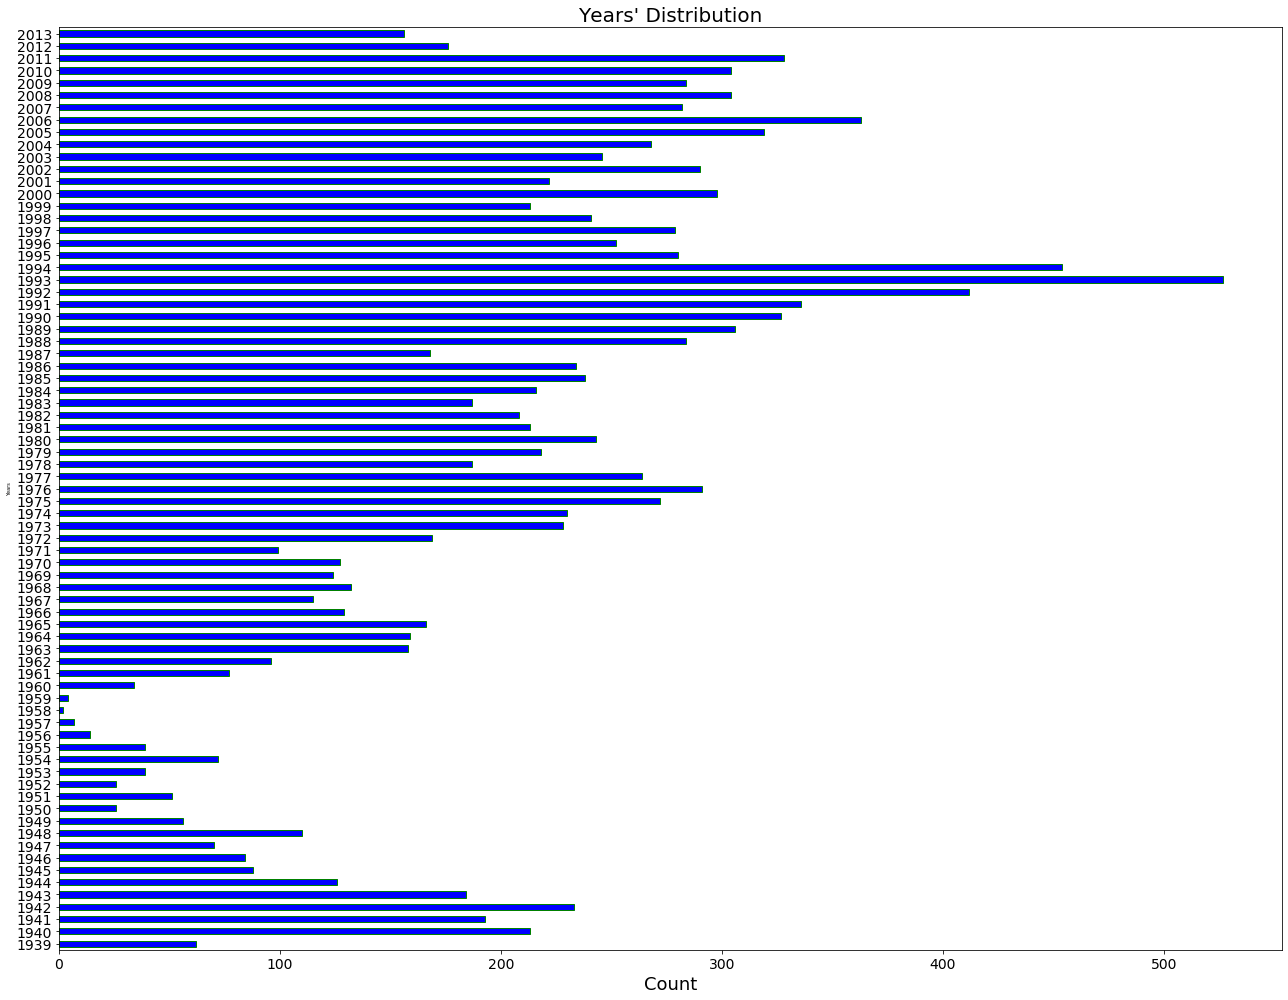

In [983]:
#creating a horizontal bar graph to see the count information of the variable year
import matplotlib.pyplot as plt
ax = dataframe['year'].value_counts().sort_index().plot(kind='barh', fontsize=14, color = 'blue', edgecolor='green', figsize=(18,14))
#customizing the title
ax.set_title("Years' Distribution", fontsize=20)
#customizing x label
ax.set_ylabel('Years', fontsize=5)
#customizing y label
ax.set_xlabel('Count', fontsize=18);
plt.tight_layout()
plt.show()

In [984]:
#checking unique values of the column "name"
dataframe['name'].unique()

array(['Spider-Man', 'Captain America', 'Wolverine', ...,
       'Katy & Timothy Bashir', "Mister Z'zz", 'Mole Monster'],
      dtype=object)

In [985]:
#checking the number of observations in teh column
len(dataframe['name'].unique())

14432

In [986]:
#performing fuzzy matching on column name.THIS TAKES A VERY LONG TIME. 
#results for threshold =90 will be printed below; We have first observation; a fuzzy match and the score for it. The list with the fuzzy matches 
#will also be saved to txt file just as a precaution since this operation takes a very long time;running it multiple times is time-consuming
import csv
import itertools
import pandas as pd
from fuzzywuzzy import fuzz
names = dataframe['name']
list2=[]
threshold_ratio = 90
for str_1, str_2 in itertools.permutations(names, 2):
    listnew = []
    ratio = (fuzz.token_sort_ratio(str_1, str_2))
    if ratio > threshold_ratio:
        row = (str_1, str_2, ratio)
        listnew.append(row)
        list2.append(str_2)
        print(listnew)
with open("filelist2.txt", "w") as output:
    output.write(str(list2))
#I will check the results and decide which are potential duplicates and which are not and compile the list with items that shouldn't be 
#removed as duplictes
  


[('John Jonah Jameson', 'John Jonah Jameson, Sr.', 92)]
[('Richard Jones', 'Ricardo Jones', 92)]
[('Human Torch', 'Inhuman Torch', 92)]
[('Karla Sofen', 'Karl Sofen', 95)]
[('William Baker', 'William Blake', 92)]
[('Peter Parker', 'Pseter Psarker', 92)]
[('Amora', 'Gamora', 91)]
[('Amora', 'Ramora', 91)]
[('Gamora', 'Amora', 91)]
[('Helmut Zemo', 'Helmuth Zemo', 96)]
[('Tony Masters', 'Tony Masterson', 92)]
[('Marrow', 'Arrow', 91)]
[('Ikaris', 'Ikari', 91)]
[('Dorrek VIII', 'Dorrek VII', 95)]
[('Andreas von Strucker', 'Andrea von Strucker', 97)]
[('Eric Williams', 'Eric Willis', 92)]
[('Skurge', 'Surge', 91)]
[('Donald Gill', 'Donald McGill', 92)]
[('Aarkus', 'Arkus', 91)]
[('Justin Hammer', 'Justine Hammer', 96)]
[('Krang', 'Skrang', 91)]
[('Modred', 'Mordred', 92)]
[('Argon', 'Targon', 91)]
[('John Jonah Jameson, Sr.', 'John Jonah Jameson', 92)]
[('Cerise', 'Cherise', 92)]
[('Mordred', 'Modred', 92)]
[('Justine Hammer', 'Justin Hammer', 96)]
[('Karkas', 'Karas', 91)]
[('Krakoa III',

[('Mei Ling', 'Mei Lin', 93)]
[('Georgia Jenkins', 'Georgie Jenkins', 93)]
[('Arkus', 'Aarkus', 91)]
[('Atalis', 'Atali', 91)]
[('Jacob Reiss', 'Jacob Reisz', 91)]
[('Jacob Reiss', 'Jacob Weiss', 91)]
[('Skragg', 'Skagg', 91)]
[('Thann', 'Thrann', 91)]
[('Grigory Russoff', 'Gregory Russoff', 93)]
[('Snakar', 'Snaykar', 92)]
[('Daniel Madrox', 'Daniel Maddox', 92)]
[('Jess Duncan', 'Duncan Vess', 91)]
[('Morag', 'Mortag', 91)]
[('Shadow Stalker', 'Shadowstalker', 96)]
[('Falzon', 'Falzone', 92)]
[('Xander', 'Xande', 91)]
[('Balzor', 'Balor', 91)]
[('Khadar', 'Kadar', 91)]
[('Eye Killers', 'Eyekillers', 95)]
[('Varga', 'Vargas', 91)]
[('Cybelle', 'Cybele', 92)]
[('Katos', 'Kratos', 91)]
[('Mei Lin', 'Mei Ling', 93)]
[('Tri-Sentinel', 'Sentinel T', 91)]
[('Skrull Prime', 'Prime Skrull', 100)]
[('Flambe', 'Flame', 91)]
[('Landa', 'Landra', 91)]
[('Landa', 'Lianda', 91)]
[('Landa', 'Landar', 91)]
[('Syphon', 'Syphonn', 92)]
[('Abysss', 'Abyss', 91)]
[('Javelynn', 'Javelynne', 94)]
[('Karima

[('Enteki II', 'Enteki I', 94)]
[('Larissa', 'Clarissa', 93)]
[('Bombardier', 'Bombadier', 95)]
[('Daakor', 'Dakor', 91)]
[('Jimmy Mulligan', 'Jim Mulligan', 92)]
[('Marian', 'Marin', 91)]
[('Masquerade', 'Masquerader', 95)]
[('Screed', 'Creed', 91)]
[('Screed', 'Scree', 91)]
[('Seven', 'Steven', 91)]
[('Darcia', 'Daria', 91)]
[('Hognir', 'Honir', 91)]
[('Spite', 'Sprite', 91)]
[('Devros', 'Devos', 91)]
[('Oculus', 'Occulus', 92)]
[('Karl Sofen', 'Karla Sofen', 95)]
[('Mrs. Shaw', 'Mr. Shaw', 93)]
[('Sariel', 'Ariel', 91)]
[('Tariel', 'Ariel', 91)]
[('Typhoon', 'Typhon', 92)]
[('Morcan', 'Moran', 91)]
[('Scree', 'Screed', 91)]
[('Sandorr', 'Sandor', 92)]
[('Xande', 'Xander', 91)]
[('Holly', 'Cholly', 91)]
[('Mr. Taylor', 'Mrs. Taylor', 95)]
[('Mrs. Taylor', 'Mr. Taylor', 95)]
[('Robert', 'Roberta', 92)]
[('Markita', 'Marita', 92)]
[('Quills', 'Quill', 91)]
[('Valerie Toomes', 'Valeria Toomes', 93)]
[('Philip', 'Phillip', 92)]
[('Crimson Dynamo X', 'Crimson Dynamo IX', 97)]
[('Crimson D

In [989]:
#checking the number of items(fuzzy matches) that might be removed from the column "name"as a duplicate
len(list2)

596

In [990]:
#checking the items of the list. 
print(list2)

['John Jonah Jameson, Sr.', 'Ricardo Jones', 'Inhuman Torch', 'Karl Sofen', 'William Blake', 'Pseter Psarker', 'Gamora', 'Ramora', 'Amora', 'Helmuth Zemo', 'Tony Masterson', 'Arrow', 'Ikari', 'Dorrek VII', 'Andrea von Strucker', 'Eric Willis', 'Surge', 'Donald McGill', 'Arkus', 'Justine Hammer', 'Skrang', 'Mordred', 'Targon', 'John Jonah Jameson', 'Cherise', 'Modred', 'Justin Hammer', 'Karas', 'Krakoa II', 'Nathan Garrett', 'Spite', 'Andreas von Strucker', 'Christine Cord', 'Arthur Chekhov', 'Yuji Watanabe', 'Dorrek VIII', 'Spikey', 'Robert', 'Chandra', 'Typhoon', 'Firearms', 'Sariel', 'Tariel', 'Nebulo', 'Jerry Hunter', 'Delphis', 'Delphic', 'Devros', 'Warren Worthington', 'Pilgrimm', 'Mirmir', 'Chandi', 'Jolena', 'Egg-Head', 'Sentinels Mk II', 'Sentinel Mk III', 'Sentinels Mk IV', 'Sentinel Mk I', 'Sentinel Mk III', 'Sentinels Mk IV', 'Benjamin Donovan, Jr.', 'Chaka', 'Varga', 'Charles Delazny Sr.', 'Robert Bruce Banner Jr.', 'Margus', 'Magnus', 'Landa', 'Number None', 'Sher-La', 'An

In [991]:
#I verified and checked the items above and created a list of items that are not duplicates( cross checked marvel.com; marvel.fandom.com) from fuzzy matches that we obtained above
mylist = ['Karl Sofen','Karla Sofen','Balor','Landra','Smokey','Aginar','Dolly Donahue','Typhoon','Phillip','Julian Grey', 'Julia Grey', 'Virago', 'Arkus','Virgo', 'Ranar', 'Kadar','Eye Killers','Susan Dane','White Face','Roy Fortune','Edith Harper','Ranark','Mrs. Meer', 'Mr. Meer','Nanna', 'Inanna','Agnar','Right', 'Ikaris','Ikari','Cat Woman','Magus','Dawn Star', 'Fritz Kron','Manoo','Spyke','Abyss','Cat-Man','Red Skelton' 'Trista', 'Tristan','Carla Strange','Water Witch', 'Evolutionary','Spinner', 'Mordred','Modred','Angel','Angela', 'Morag', 'Mortag', 'Bartak','Lawrence Zaxton', 'Baldar','Baldrick','Kalibar','Georgia Jenkins', 'Charles Delazny Jr.', 'Zarina','Katos', 'Andros', 'Charles Grey','Andrei Rostov', 'Mei Lin', 'Mei Ling', 'Robert Hagon','Carlton Velcro', 'Joseph Danvers, Jr.', 'Tony Masters', 'Jerome Jaxon','Tony Romeo',  'Argon','Revolutionary', 'Anelle', 'Reverend Paul', 'Mana Yanowa', 'Titus','Black Mariah','Megara''Ledge','Marrow','John Jonah Jameson','Delphis','Magnus','Arkus','John Jonah Jameson, Sr.','Andreas von Strucker', 'Arthur Chekhov','Yuri Watanabe','Firearms','Shakti', 'Shara','Michael Shauneghan', 'Antaeus','BlackJack','Sky-Walker','Chang','Kwai Jun-Fau', 'Frederick Hudson','William Blake','Morcan', 'Moran', 'Steven', 'Seven','Barker', 'Baker', 'Mrs. Munroe', 'Mr. Munroe', 'Chandra', 'Candra', 'Chandra', 'Chanda', 'Carol', 'Carole', 'Scree', 'Screed','Landar', 'Landa','Althea', 'Kalthea', 'Dagon', 'Dragon', 'Zendrao', 'Zedrao', "K'Rel", 'Ko-rel', 'Magnar', 'Agnar', 'Sandorr', 'Sandor', 'Xande', 'Xander','Blaze','Helios','Sarak', 'Sarnak','Shakan','Wilson Allan', 'Oliver Stoker', 'Olivia Hooks', 'Helmut Zemo','Synapse','Syphon','Shaka', 'Shade','Sher-La','Shadow Stalker', 'Falzone',  'Lasher' 'Helio','Bran Carter', 'Brad Carter',  'Linda', 'Lianda', 'Holly', 'Cholly','Mrs. Cohuelo', 'Mr. Cohuelo', 'Delphic', 'Delphi', 'Thrann', 'Thann',  'Mr. Taylor', 'Mrs. Taylor', 'Robert', 'Roberta','Korda', 'Knorda', 'Moran', 'Morgan', 'Morga','Baski', 'Baskin', 'Mrs. Abbott', 'Mr. Abbott',  'Mrs. Miller', 'Mr. Miller','Markita', 'Marita', 'Quills', 'Quill','Carole', 'Carol','Ramora','Gamora','Chuda','Sandor','Jacob Reiss','Korrek','Orrek', 'Dorrek','Zargus', 'Argus', 'Morag','Krato', 'Kratos', 'Cylla', 'Scylla','Robert Bruce Banner Jr.', 'Robert Bruce Banner', 'Atali', 'Atalis', 'Atha Williams', 'Martha Williams','Sandorr',  'Chudar','Wazir', 'Wazira''Marita','Mrs. Macik','Mr. Macik', 'Khadar', 'Mr. Brokeridge','Balda','Mr. Canfield', 'Warren Worthington Jr.','Mrs. Brokeridge','Benjamin Donovan','Mrs. Borkowski','Daniel Madrox', 'Mr. Borkowski','Mrs. Canfield', 'Morgan','Stinger','Tetra','Brain', 'Jess Duncan', 'Rick Chalker','Karima', 'Mrs. Shaw','Lyander','Dick Chalker','Ticker', 'Chaka', 'Sharman', 'Phelix','Duncan Vess','Mimir', 'Skrang', 'Krang','Skagg', 'Skragg','Rococo','Occulus', 'Amazon','Zorba', 'Cho Lee','Carlo Strange','Angela Golden',  'Brainy','Monstro', 'Monstrom','Morcan', 'Captain Sturm', 'Captain Storm','Cylla','Chandi','Mathers', 'Smathers',  'Candi',  'Starra', 'Jean Bradley', 'Jane Bradley', 'Sashia', 'Amazo', 'Andre','Amora', 'Karia', 'Xande','Ugarth','Garth','Chakra','Egg-Head','Grondar', 'Pilgrim','Nebulo','Gronk', 'Cybelle','Alan Wilson','Dakor','Jackal','Grigory Russoff','Jim Mulligan','Masquerader', 'Goroth','Skagg','Crime-Wave', 'Jacob Weiss', 'Jacob Reisz', "K'Rel", 'Voltor', 'Blazer','Iraina','Megaera','Water', 'Number Nine','John Howlett, Jr.','Bardak', 'Lawrence Paxton','Arrow', 'Virgo', 'Bull Dawson', 'Smoke','Thais', 'Atha Williams','Jolen','Joseph Danvers','Phlopp','Bombadier', "Dragon', Jr.",'Eric Willis', 'Skrang', 'Targon', 'Karas','Nathan Garrett', 'Spite', 'Christine Cord', 'Robert','Tariel','Sariel', 'Anielle', 'Ouranos','Christian Cord', 'General Chen', 'Alibar','Tariel', 'General Chasen', 'Zarin', 'Richard Jones','Charn', 'Javelynn', "W'Kandro", 'Hoggscarr','Ophelia Jones','Karkas','Inanna', 'Zargus', 'Darcia','Harrow','Golden Angel', 'Markita', 'Marista', 'Tristan','Orrek', 'Sledge', 'Sher-La', 'Hagen', 'Helios','Jerry Hunter','Devros', 'Margus', 'Number None','Landa','Mirmir', 'Agnar', 'Balzor', 'Robert Carter','Wright', 'Kamara', 'Barak','Andro','Ranar','Zoroba','Ho Lee','Charles Delazny Sr.','Marian', 'Uthar', 'Ruthar', 'Chandi','Cherise', 'Cerise','Krodar', 'Karl Sofen', 'Karla Sofen', 'Mrs. Shaw', 'Mr. Shaw', 'Sariel', 'Ariel', 'Tariel', 'Ariel','Wazira', 'Wazir','Kroda', 'Sharman', 'Shaman','Marian', 'Marin','Chanda','Scree', 'Seven', 'Steven','Darcia', 'Daria', 'Hognir', 'Honir','Spite', 'Sprite', 'Devros', 'Devos', 'Prime Skrull',  'Chandra','Creed', 'Screed', 'Charn', 'Charon','Jolena','Iraina', 'Raina', 'Stinger', 'Singer','Stinger', 'Stringer', 'Surge', 'Skurge', 'Andre', 'Dandre', 'Andre', 'Andrex','Chaka','Benjamin Donovan, Jr.','Chudar', 'Chuda','Alphan', 'Alpha','Bulwark', 'Bulwar', 'Clarissa', 'Larissa','Jamala', 'Jamal','Bert Packer', 'Bert Tacker','Kamara', 'Kamar', 'Voltor','Varga','William Blake', 'William Baker','Cholly', 'Holly','Targo', 'Targon', 'Baker', 'Barker', 'Baskin', 'Baski', 'Eric Willis', 'Eric Williams','Scott Lawrence', 'Lawrence Schrott','Trogg', 'Throgg']

In [992]:
#checking the length of the list
len(mylist)

448

In [993]:
#I might have added items twice so I am making sure I don't have duplicates in this list. Creating a new list without duplicates
newlist = []
for i in mylist:
  if i not in newlist:
    newlist.append(i)


In [994]:
#checking the number of items in the new list
len(newlist)

379

In [995]:
#creating one more list where the items from list2 (all of the fuzzy matchy items) will remove the items that are not duplicates (newlist) 
#we have a list of items that needs to be removed since it contains duplicates 
anotherlist = [x for x in list2 if x not in newlist]
len(anotherlist)

195

In [996]:
#checking this list against the same values being there twice
anothernewlist = []
for i in anotherlist:
  if i not in anothernewlist:
    anothernewlist.append(i)

In [997]:
#now we have a final list of duplicates that needs to serve as a basis for removing character duplicates from column "name"
#number of items in tghis list
len(anothernewlist)

169

In [998]:
print(anothernewlist)

['Ricardo Jones', 'Inhuman Torch', 'Pseter Psarker', 'Helmuth Zemo', 'Tony Masterson', 'Dorrek VII', 'Andrea von Strucker', 'Donald McGill', 'Justine Hammer', 'Justin Hammer', 'Krakoa II', 'Yuji Watanabe', 'Dorrek VIII', 'Spikey', 'Warren Worthington', 'Pilgrimm', 'Sentinels Mk II', 'Sentinel Mk III', 'Sentinels Mk IV', 'Sentinel Mk I', 'Groonk', 'Tethra', 'Nebulon', 'Nebulos', 'James Lardner', 'Gregory Russoff', 'Aneka', 'Jason Jerome', 'Jomo Kimane', 'Oculus', 'Ledge', 'Jerry Hunt', 'Dolly Donohue', 'Animator', 'Dakkor', 'Daakor', 'Gregor Russoff', 'Carton Velcro', 'Troll', 'Hana Yanowa', 'Anneka', 'Chakar', 'Snakar', 'Weather Witch', 'Donald Gill', 'Rob Fortune', 'Megara', 'Baron', 'Gorth', 'Trista', 'Jimmy Mulligan', 'Trolls', 'Thaiis', 'Paul Revere', 'Dragona', 'Dragoon', 'Tityus', 'Black Maria', 'Gareth', 'Shades', 'Hargen', 'Pester', 'Chango', 'Orphelia Jones', 'Baldric', 'Robert Hao', 'Skrull Prime', 'Olivier Stoker', 'Psynapse', 'Firearm', 'Shakati', 'Valerie Toomes', "'Spinne

In [999]:
#final check of dataframe dimensions before removing these duplicates
dataframe.shape

(14432, 8)

In [1000]:
#removing the duplicates of characters from column "name" after fuzzy matching analysis
dataframe = dataframe[~dataframe['name'].isin(anothernewlist)]
dataframe.head()

,name,identity,personality,eye,hair,gender,alive,year
0,Spider-Man,secret,good,hazel,brown,male,living,1962
1,Captain America,public,good,blue,white,male,living,1941
2,Wolverine,public,neutral,blue,black,male,living,1974
3,Iron Man,public,good,blue,black,male,living,1963
4,Thor,no dual,good,blue,blond,male,living,1950


In [1001]:
#checking the dataframe dimensions
dataframe.shape

(14263, 8)

In [1002]:
#one more problem in the column 'name' that I noticed is that some of the comic characters have bothe their character name(nickname "Hulk")and 
#the character's full name listed as separate items. Marvel.com does not treat them as separate characters. Peter Parker is an exception because 
#Peter Parker is also listed as Spiderwoman's father, as a separate character. I created a list of full names of the main and most often
#used full names of marvel characters

In [1003]:
#creating a list with full names of some of the comic characters that are simpy duplicates because the caracters nicknames (Hulk, for example)are already in the data frame.
#I used https://www.superherodb.com/marvel-characters-with-first-and-last-names-that-start-with-the-same-letter/800-340/ as a basis and looked up how characters' nicknames and full names are handled  on Marvel.com 
#I am removing the full names thus eliminating some more duplicates. My main guidance for character names for this project will be Marvel.com
fullnameslist = ['Bucky Barnes', 'Miles Morales','Norrin Radd', 'Pepper Potts', 'James Arthur', 'Kamala Khan', 'Mark Raxton', 'Reed Richards', 'John Jameson', 'Loki Laufeyson', 'Curtis Connors','Susan Storm Richards', 'Mark Milton','Bruce Banner','Norman Osborn','Stephen Strange', 'Otto Octavius', 'Victor von Doom', 'Wade Wilson', 'Matt Murdock', 'Scott Summers', 'Blackagar Boltagon', 'Carl Creel']

In [1004]:
#removing the duplicates described above
dataframe = dataframe[~dataframe['name'].isin(fullnameslist)]
dataframe.head()

,name,identity,personality,eye,hair,gender,alive,year
0,Spider-Man,secret,good,hazel,brown,male,living,1962
1,Captain America,public,good,blue,white,male,living,1941
2,Wolverine,public,neutral,blue,black,male,living,1974
3,Iron Man,public,good,blue,black,male,living,1963
4,Thor,no dual,good,blue,blond,male,living,1950


In [1005]:
#checking the dimensions of the dataframe
dataframe.shape

(14249, 8)

In [1006]:
#showing unique values for the variable 'eye'
dataframe['eye'].unique()

array(['hazel', 'blue', 'brown', 'green', 'yellow', 'gold', 'grey', 'red',
       'black eyeballs', 'amber', 'variable', nan, 'black', 'white',
       'orange', 'silver', 'purple', 'pink', 'one eye', 'violet',
       'multiple', 'magenta', 'yellow eyeballs', 'no', 'compound'],
      dtype=object)

In [1007]:
#identifying missing values. There are more than half. After scraping the website Marvel.com I will have the same column and there is a 
#possibility that I will be able to add some of the values from the web scraped data to this column. My decision for now is not to remove
#the missing values and do so after the analysis of the same column in data set from scraped website is performedand the dataframes are merged.
dataframe['eye'].isnull().sum()

8383

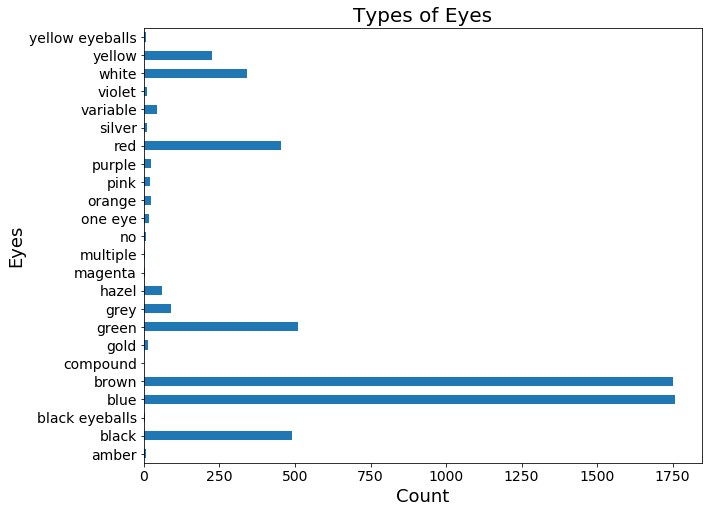

In [1008]:
#creating a graph showing the count of certain types of eyes
import matplotlib.pyplot as plt
ax = dataframe['eye'].value_counts().sort_index().plot(kind='barh', fontsize=14, figsize=(10,8))
#customizing the title
ax.set_title('Types of Eyes', fontsize=20)
#customizing x label
ax.set_xlabel('Count', fontsize=18)
#customizing y label
ax.set_ylabel('Eyes', fontsize=18);
plt.show()
#we have quite a few values underrepresented but we are missing more than half observations as of now so I will again wait
#to remove any data for this column until I merge it with the data frame from the website marvel.com

In [1009]:
#showing unique values for column 'hair'
dataframe['hair'].unique()

array(['brown', 'white', 'black', 'blond', 'no', 'blue', 'red', 'bald',
       'auburn', 'grey', 'silver', 'purple', 'strawberry blond', 'green',
       'reddish blond', 'gold', nan, 'orange', 'pink', 'variable',
       'yellow', 'light brown', 'magenta', 'bronze', 'dyed',
       'orange-brown'], dtype=object)

In [1010]:
#a lot of the comic characters have dyed hair and the color usually is identified by the one that is it is dyed into.
#So, I am replacing dyed into Black for this sepcific character (I looked the color of her hair up).
dataframe[dataframe['hair']=='dyed']

,name,identity,personality,eye,hair,gender,alive,year
5842,Susan Rice,public,neutral,NaN,dyed,female,living,2013


In [1011]:
#replacing
dataframe['hair'].replace(['dyed'], 'black', inplace=True)
dataframe.loc[ 5842, : ]

name           Susan Rice
identity           public
personality       neutral
eye                   NaN
hair                black
gender             female
alive              living
year                 2013
Name: 5842, dtype: object

In [1012]:
#looking up examples of characters that have "No " as a value in the column hair 
#to see how they are different from the characters that have 'Bald' in that column. Characters with "No " are usually type of creatures like robots and etc 
#that could not potentially have any hair vs bald looking humans. 
dataframe[dataframe['hair']=='no']

,name,identity,personality,eye,hair,gender,alive,year
5,Benjamin Grimm,public,good,blue,no,male,living,1961
30,Vision,secret,good,gold,no,male,living,1968
87,Galactus,secret,neutral,brown,no,male,living,1966
106,Venom,known to authorities,neutral,variable,no,agender,living,1984
129,Thanos,no dual,bad,red,no,male,living,1973
...,...,...,...,...,...,...,...,...
16117,Death's Head,secret,good,red,no,male,living,2010
16125,Tul'uth,NaN,bad,yellow,no,male,living,2010
16127,All-Mother,no dual,NaN,NaN,no,female,deceased,2011
16156,Guard Dog,secret,bad,NaN,no,NaN,living,2012


In [1013]:
#identifying missing values. There are about a fourth of the data set. After scraping the website marvel.com I will have the same column and there is a 
#possibility that I will be able to add some of the values from the web scraped data to this column. My decision for now is not to remove
#the missing values and do so after the analysis of the same column in data set from scraped website is performed.
dataframe['hair'].isnull().sum()

3494

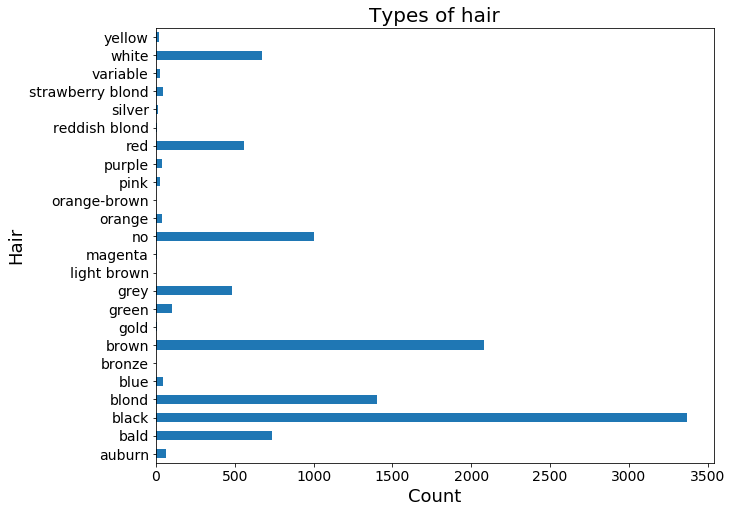

In [1014]:
#creating a graph showing the count of certain types of hair
import matplotlib.pyplot as plt
ax = dataframe['hair'].value_counts().sort_index().plot(kind='barh', fontsize=14, figsize=(10,8))
#customizing the title
ax.set_title('Types of hair', fontsize=20)
#customizing x label
ax.set_xlabel('Count', fontsize=18)
#customizing y label
ax.set_ylabel('Hair', fontsize=18);
plt.show()
#we have quite a few values underrepresented but we are missing a lot of  observations as of now so I will again wait
#to remove any data for this column until I merge it with the data frame from the website marvel.com

In [1015]:
#showing unique values for the column "gender"
dataframe['gender'].unique()

array(['male', 'female', 'agender', nan, 'genderfluid'], dtype=object)

In [1016]:
#identifying missing values. After making a call to API I will have the same column and there is a 
#possibility that I will be able to add some of the values from the data from API to this column. My decision for now is not to remove
#the missing values and do so after the analysis of the same column in data set from API is performed.
dataframe['gender'].isnull().sum()

686

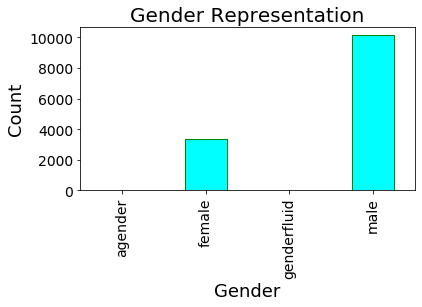

In [1017]:
#creating the bar graph to see the count of these values
import matplotlib.pyplot as plt
ax = dataframe['gender'].value_counts().sort_index().plot(kind='bar',color = '#00FFFF', edgecolor='green', fontsize=14, figsize=(6,3))
#customizing the title
ax.set_title('Gender Representation', fontsize=20)
#customizing x label
ax.set_xlabel('Gender', fontsize=18)
#customizing y label
ax.set_ylabel('Count', fontsize=18);
plt.show()
#we can tell that the agender and genderfluid are underrepresented but I might be able to get some more data from the data set from API since the data I was able to retrive has a variable "gender", so
#I will not be removing any of the two values that are really poorly represented for now (but there is a likelihood that I will in the future) if analysis of this variable will be essential.

In [1018]:
#checking unique values for column 'identity'
dataframe['identity'].unique()

array(['secret', 'public', 'no dual', 'known to authorities', nan],
      dtype=object)

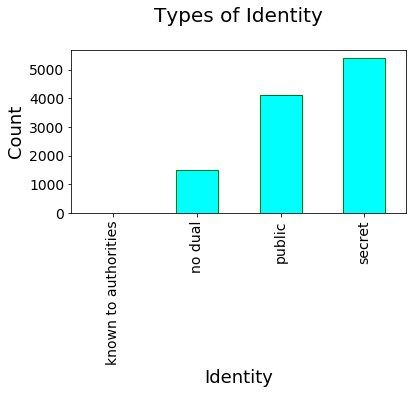

In [1019]:
#creating a graph to represent this variable
import matplotlib.pyplot as plt
ax = dataframe['identity'].value_counts().sort_index().plot(kind='bar', color = '#00FFFF', edgecolor='green', fontsize=14, figsize=(6,3))
#customizing the title
ax.set_title('Types of Identity\n', fontsize=20)
#customizing x label
ax.set_xlabel('Identity', fontsize=18)
#customizing y label
ax.set_ylabel('Count', fontsize=18);
#ax.set_ylim(0,1000)
plt.show()

In [1020]:
dataframe[dataframe['identity']=='known to authorities']
#this group would not be useful for the analysis of the identity since it is significantly underrepresented. I will remove these observations from the data. 

,name,identity,personality,eye,hair,gender,alive,year
106,Venom,known to authorities,neutral,variable,no,agender,living,1984
120,Angelica Jones,known to authorities,good,green,red,female,living,1985
283,X-51,known to authorities,good,red,black,male,living,1977
373,Jacques Duquesne,known to authorities,good,blue,black,male,living,1965
950,Abigail Boylen,known to authorities,good,blue,blond,female,living,2007
1014,Elias Wirtham,known to authorities,good,brown,black,male,living,1990
1313,Terrance Ward,known to authorities,good,brown,black,male,living,2007
1448,Emery Schaub,known to authorities,good,blue,NaN,male,living,2008
2137,Leper Queen,known to authorities,bad,brown,bald,female,deceased,2006
2668,Obax Majid,known to authorities,neutral,brown,black,female,living,1993


In [1021]:
dataframe = dataframe[dataframe['identity']!='known to authorities']

In [1022]:
dataframe.shape

(14235, 8)

In [1023]:
#This column could be used for classification analysis in the future thusI am going to impute the missing values with the mode but will do it together with the next column I analyze. 
#checking the number of missing values
dataframe['identity'].isnull().sum()

3202

In [1024]:
#checking unique values for variable 'personality'
dataframe['personality'].unique()

array(['good', 'neutral', 'bad', nan], dtype=object)

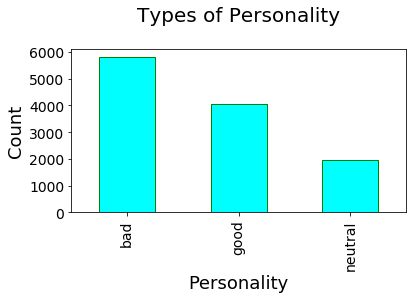

In [1025]:
#creating a graph to represent this variable
import matplotlib.pyplot as plt
ax = dataframe['personality'].value_counts().sort_index().plot(kind='bar', color = '#00FFFF', edgecolor='green', fontsize=14, figsize=(6,3))
#customizing the title
ax.set_title('Types of Personality\n', fontsize=20)
#customizing x label
ax.set_xlabel('Personality', fontsize=18)
#customizing y label
ax.set_ylabel('Count', fontsize=18);
plt.show()
#unique values are represented well

In [1026]:
#checking the number of missing values
dataframe['personality'].isnull().sum()

2418

In [1027]:
#this variable could also be used for classification analysis in the future thus I am imputing the missing values with the mode.
#computing modes for variables "identity" and "personality"
mode = dataframe.filter(["identity", "personality"]).mode()
mode

,identity,personality
0,secret,bad


In [1028]:
#imputing the values of columns 'identity' and 'personality' with the mode
cols = ["identity", "personality"]
dataframe[cols]=dataframe[cols].fillna(dataframe.mode().iloc[0])

In [1029]:
#checking if the imputation was successful
print(dataframe['identity'].isnull().sum())
print(dataframe['personality'].isnull().sum())

0
0


In [1030]:
dataframe.shape


(14235, 8)

In [1031]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14235 entries, 0 to 16175
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         14235 non-null  object
 1   identity     14235 non-null  object
 2   personality  14235 non-null  object
 3   eye          5854 non-null   object
 4   hair         10742 non-null  object
 5   gender       13549 non-null  object
 6   alive        14235 non-null  object
 7   year         14235 non-null  int32 
dtypes: int32(1), object(7)
memory usage: 945.3+ KB


In [1032]:
#we have 3 columns with missing values. As explained above I might get rid of some of the missing values for these columns
#after working on 2 other data sets since these columns will be present there as well. The rest of the columns' missing values and the duplicates 
#from column "name" have been handled.The number of observations decreased from 16376 to 14235 after deduplicating the column "name" 
#and removing some missing values from column "year" and "alive" with the number of duplicates accounting for the most of the removed variables.

In [1033]:
print("Summarized Data")
print("-"*125)
print(dataframe.describe(include=['O']))

Summarized Data
-----------------------------------------------------------------------------------------------------------------------------
                name identity personality   eye   hair gender   alive
count          14235    14235       14235  5854  10742  13549   14235
unique         14235        3           3    24     24      4       2
top     Herr Mongrel   secret         bad  blue  black   male  living
freq               1     8615        8222  1755   3364  10152   10915


In [1034]:
dataframe.tail(10)

,name,identity,personality,eye,hair,gender,alive,year
16166,Simone,public,good,black,black,female,living,2012
16167,Taurus,secret,bad,hazel,black,male,deceased,2012
16168,The Hypst'r,secret,good,NaN,NaN,male,living,2012
16169,Tito,public,good,NaN,red,NaN,living,2012
16170,Virgo,secret,bad,black,brown,female,deceased,2012
16171,Spider-Girl,no dual,neutral,brown,blond,female,living,2013
16172,James Monroe,public,bad,NaN,NaN,male,living,2013
16173,Katy & Timothy Bashir,secret,bad,brown,black,female,deceased,2013
16174,Mister Z'zz,secret,good,white,NaN,male,deceased,2013
16175,Mole Monster,secret,neutral,yellow,black,male,living,2013


In [1036]:
dataframe.reset_index(drop=True, inplace=True)

In [1037]:
dataframe.tail()

,name,identity,personality,eye,hair,gender,alive,year
14230,Spider-Girl,no dual,neutral,brown,blond,female,living,2013
14231,James Monroe,public,bad,NaN,NaN,male,living,2013
14232,Katy & Timothy Bashir,secret,bad,brown,black,female,deceased,2013
14233,Mister Z'zz,secret,good,white,NaN,male,deceased,2013
14234,Mole Monster,secret,neutral,yellow,black,male,living,2013


In [1038]:
#saving this dataframe to a csv file to use it in the future.
dataframe.to_csv('marvelscomics.csv')